In [2]:
import os
try:
    import patoolib
except:
    !pip install patoolib

path = '..\\3. Dataset\\AI Specialist Lesson 03\\'
if not os.path.exists(path):
    patoolib.extract_archive('..\\3. Dataset\\AI Specialist Lesson 03.zip')

os.chdir(path)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Image

In [4]:
data = pd.read_csv("person_data.csv")
display(data.head())
print(data.shape)

,Age,Height,Weight
0,10,138,23.0
1,11,138,22.0
2,12,138,23.5
3,13,139,24.0
4,14,139,26.0


(71, 3)


In [8]:
StatsDF = data.describe(include='all')
display(StatsDF)

,Age,Height,Weight
count,71.000000,71.000000,71.000000
mean,45.000000,160.873239,65.281690
std,20.639767,20.842902,17.752805
min,10.000000,138.000000,22.000000
25%,27.500000,143.500000,59.750000
50%,45.000000,155.000000,70.000000
75%,62.500000,171.500000,77.000000
max,80.000000,208.000000,96.000000


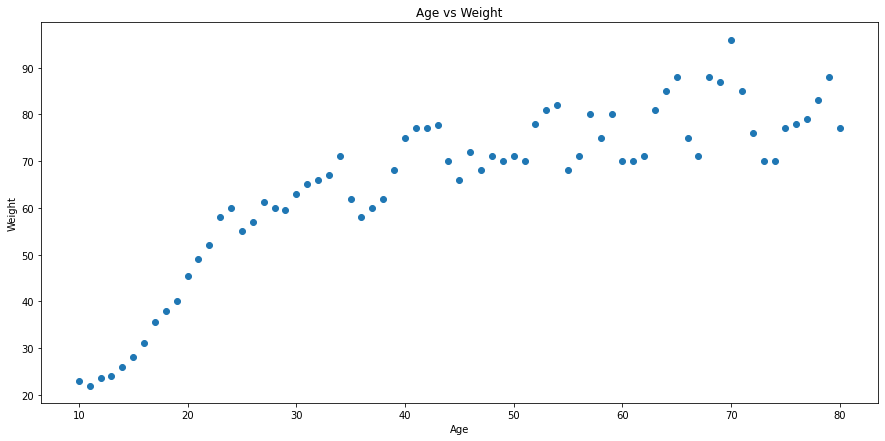

In [9]:
# Data visualization
feature_Y = "Weight"
feature_X = "Age"

plt.figure(figsize=(15, 7))
plt.scatter(data[feature_X], data[feature_Y])
plt.title(f'{feature_X} vs {feature_Y}')
plt.xlabel(feature_X)
plt.ylabel(feature_Y)
plt.show()

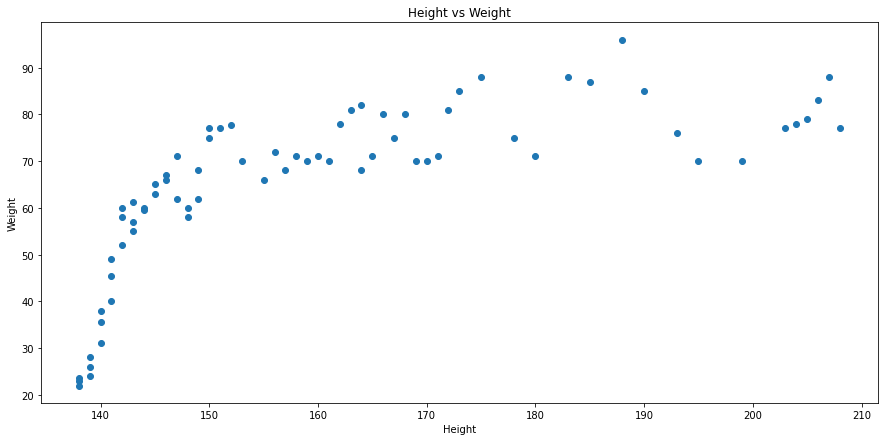

In [10]:
# Data visualization
feature_Y = "Weight"
feature_X = "Height"

plt.figure(figsize=(15, 7))
plt.scatter(data[feature_X], data[feature_Y])
plt.title(f'{feature_X} vs {feature_Y}')
plt.xlabel(feature_X)
plt.ylabel(feature_Y)
plt.show()

In [13]:
feature = ["Age", "Height"]
target = "Weight"

X = data[feature].values
y = data[target].values

print(X[:5])
print(y[:5])

[[ 10 138]
 [ 11 138]
 [ 12 138]
 [ 13 139]
 [ 14 139]]
[23.  22.  23.5 24.  26. ]


In [14]:
from sklearn.preprocessing import StandardScaler

sc  = StandardScaler()
X_scaled = sc.fit_transform(X)

print(f'Before scaling: Mean = {np.mean(X, axis=0)}, Std = {np.std(X, axis=0)}')
print(f'After scaling: Mean = {np.mean(X_scaled, axis=0)}, Std = {np.std(X_scaled, axis=0)}')

Before scaling: Mean = [ 45.         160.87323944], Std = [20.49390153 20.69560039]
After scaling: Mean = [3.12738880e-18 2.50191104e-16], Std = [1. 1.]


In [15]:
from sklearn.decomposition import PCA 

pca = PCA()
X_pca = pca.fit_transform(X_scaled)
print(X_pca[:5])

[[-1.98912492  0.42610453]
 [-1.95462165  0.39160125]
 [-1.92011837  0.35709798]
 [-1.85144808  0.35676171]
 [-1.8169448   0.32225843]]


In [16]:
print(pca.explained_variance_ratio_ * 100)

[97.36416205  2.63583795]


In [18]:
pca = PCA(n_components=1, random_state=12)
X_pca = pca.fit_transform(X_scaled)
print(X_pca[:5])
print(X_pca.shape)

[[-1.98912492]
 [-1.95462165]
 [-1.92011837]
 [-1.85144808]
 [-1.8169448 ]]
(71, 1)


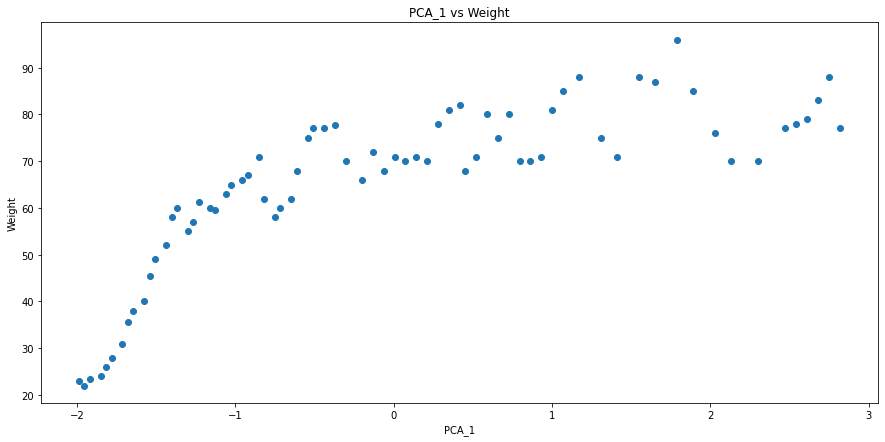

In [19]:
# Data visualization
feature_Y = "Weight"
feature_X = "PCA_1"

plt.figure(figsize=(15, 7))
plt.scatter(X_pca, data[feature_Y])
plt.title(f'{feature_X} vs {feature_Y}')
plt.xlabel(feature_X)
plt.ylabel(feature_Y)
plt.show()

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X_pca)
print(X_poly[:5])
print(X_poly.shape)

[[-1.98912492  3.95661797 -7.87020741 15.65482573]
 [-1.95462165  3.82054578 -7.46772149 14.59657007]
 [-1.92011837  3.68685455 -7.07919715 13.59289647]
 [-1.85144808  3.42786    -6.34650481 11.75022416]
 [-1.8169448   3.30128842 -5.99825883 10.89850522]]
(71, 4)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

rgr = LinearRegression()
rgr.fit(X_poly, y)
y_pred = rgr.predict(X_poly)

print("R2: ", r2_score(y, y_pred))
print("RMSE: ", mean_squared_error(y, y_pred, squared=False))

R2:  0.9017224665462797
RMSE:  5.52603911447949


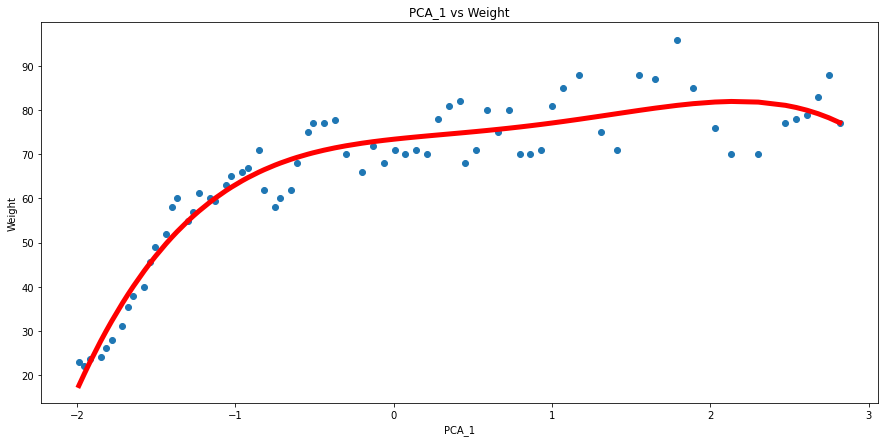

In [23]:
# Data visualization
feature_Y = "Weight"
feature_X = "PCA_1"

plt.figure(figsize=(15, 7))
plt.scatter(X_pca, data[feature_Y])
plt.plot(X_pca, y_pred, color = "red", lw=5)
plt.title(f'{feature_X} vs {feature_Y}')
plt.xlabel(feature_X)
plt.ylabel(feature_Y)
plt.show()

In [24]:
from sklearn.pipeline import Pipeline

sc = StandardScaler()
pca = PCA(n_components=1, random_state=12)
poly_features = PolynomialFeatures(degree=4, include_bias=False)
rgr = LinearRegression()

modelling_pipeline = Pipeline([
    ('std_scaler', sc),
    ('pca', pca),
    ('poly', poly_features),
    ('regressor', rgr)
])

modelling_pipeline.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('pca', PCA(n_components=1, random_state=12)),
                ('poly', PolynomialFeatures(degree=4, include_bias=False)),
                ('regressor', LinearRegression())])

In [25]:
y_predict_pipeline = modelling_pipeline.predict(X)

print("R2: ", r2_score(y, y_predict_pipeline))
print("RMSE: ", mean_squared_error(y, y_predict_pipeline, squared=False))

R2:  0.9017224665462797
RMSE:  5.52603911447949


In [26]:
X_new = np.array([[22, 175], [50, 168]])
weight_predict = modelling_pipeline.predict(X_new)
weight_predict

array([71.88471548, 74.83310691])